In [1]:
# Setup
# pandas dataframe
import pandas as pd
# matplotlib
import matplotlib.pyplot as plt
# Read in csv file
books = pd.read_csv("books.csv")

In [2]:
# View our dataset from top
# Get a sense of our data columns
books.head(5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,517226952,9780517226957,eng,815,3628,254,11/01/2005,Gramercy Books
1,2,The Ultimate Hitchhiker's Guide to the Galaxy ...,Douglas Adams,4.38,345453743,9780345453747,eng,815,249558,4080,04/30/2002,Del Rey Books
2,4,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams,4.22,1400052920,9781400052929,eng,215,4930,460,08/03/2004,Crown
3,5,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams/Stephen Fry,4.22,739322206,9780739322208,eng,6,1266,253,03/23/2005,Random House Audio
4,8,The Ultimate Hitchhiker's Guide (Hitchhiker's ...,Douglas Adams,4.38,517149257,9780517149256,eng,815,2877,195,01/17/96,Wings Books


In [3]:
# Let us see a few books at the bottom of the file
books.tail(5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
11122,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
11123,45633,You Bright and Risen Angels,William T. Vollmann,4.08,140110879,9780140110876,eng,635,783,56,12/01/1988,Penguin Books
11124,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,140131965,9780140131963,eng,415,820,95,08/01/1993,Penguin Books
11125,45639,Poor People,William T. Vollmann,3.72,60878827,9780060878825,eng,434,769,139,02/27/2007,Ecco
11126,45641,Artemis Fowl (Artemis Fowl #1),Eoin Colfer/Nathaniel Parker,3.84,1400085918,9781400085910,eng,6,55,14,04/06/2004,Listening Library


In [4]:
# Basic statistics collected from our dataframe
books.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11127.000000,11127.000000,1.112700e+04,11127.000000,1.112700e+04,11127.000000
mean,21310.938887,3.933631,9.759888e+12,336.376921,1.793641e+04,541.854498
std,13093.358023,0.352445,4.428964e+11,241.127305,1.124794e+05,2576.176608
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10287.000000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780586e+12,299.000000,7.450000e+02,46.000000
75%,32104.500000,4.135000,9.780873e+12,416.000000,4.993500e+03,237.500000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [5]:
# how many rows of information are there, with each row representing a book?
# use Python len() method  
len(books) # 11127 rows

11127

In [6]:
# dataframe has an attribute that can tell us how many rows and columns it has
# each row is an individual piece of data
# each column (12 in this dataframe) is a feature of each data point
books.shape

(11127, 12)

In [7]:
# it is important and necessary to understand what type of data exists in each feature
# let us look at data types of the dataframe
books.dtypes

bookID                  int64
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                  int64
language_code          object
num_pages               int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
dtype: object

From the data type list above, we notice that *publication_date* is not of a date type. We can change it into python datetime object. 

In [8]:
# using pandas to_datetime method to modify data type of publication_date
books['publication_date'] = pd.to_datetime(books['publication_date'])
# verify that we accomplish it
books.dtypes

bookID                         int64
title                         object
authors                       object
average_rating               float64
isbn                          object
isbn13                         int64
language_code                 object
num_pages                      int64
ratings_count                  int64
text_reviews_count             int64
publication_date      datetime64[ns]
publisher                     object
dtype: object

## What is the most popular book?

How do we define popularity for book? A book with a high rating does not necessarily mean that it is popular. Based on the available features, we also need to consider the number of ratings that each book receives. For a book to be popular, it must possess both a high rating count as well as a favorable rating by the readers.

How do we determine what constitutes a good rating for popular book? First of all, book rating is subjective to the reader and their experience. A book can be described as good by one person and bad by another. So the best thing we can do is to agree on a rating that we think best serves us in determining a good rating. To do that task, we need to pay attention to the *average_rating* column. We should not consider maximum found in our statistical table for *average_rating* because it is not helpful as a cutoff point. Looking at the mean (3.93) and 75th percentile (4.13), we understand that 75% of book ratings fall below 4.1 and the average rating among all books is 3.9. This gives us a good cutoff of 4.0 where anything that is rated above that rating can be considered to be popular.      

As for the rating count, the approopriate feature to examine is the *ratings_count*, and we want to look at the collected statistical data in our table for that feature in order to determine the right cutoff point. Both minimum and maximum don't seem to be of much help. The mean is 17,936, and if we are to use it, we may disregard a lot of books in our dataframe. Let us look at the different percentiles. There are 25% of books with 104 ratings or fewer, 50% with 745 ratings or fewer, and 75% with 4993 ratings or fewer. With this information, we see that the majority of books receives just shy of 5000 ratings, and it would be wise to include more books in our search. So a 5000 cutoff is a bit high. It is advisable to use the 50% percentile, and we will look at the upper half of our books based on the count of 1000 ratings or more, which will allow us to look through more books with considerable amount of reader ratings.

In [9]:
# below are our changeable cutoffs
ratings_count_cutoff = 1000
rating_cutoff = 4.0
# filter dataframe with ratings_count
books_with_large_count = books[books['ratings_count'] >= ratings_count_cutoff]
# filter above dataframe with average_rating
books_with_high_rating = books_with_large_count[books_with_large_count['average_rating'] > rating_cutoff]
# see what the most popular book is
books_with_high_rating.sort_values(by=['average_rating'], ascending=False)[:5]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
6590,24812,The Complete Calvin and Hobbes,Bill Watterson,4.82,740748475,9780740748479,eng,1456,32213,930,2005-09-06,Andrews McMeel Publishing
11,18,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9780439682589,eng,2690,41428,164,2004-09-13,Scholastic
6592,24814,It's a Magical World (Calvin and Hobbes #11),Bill Watterson,4.76,836221362,9780836221367,eng,176,23875,303,1996-09-01,Andrews McMeel Publishing
13,22,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,439827604,9780439827607,eng,3342,28242,808,2005-09-12,Scholastic
6593,24816,Homicidal Psycho Jungle Cat (Calvin and Hobbes...,Bill Watterson,4.72,836217691,9780836217698,eng,176,15365,290,1994-09-06,Andrews McMeel Publishing


In this result of top five books, we see that *The Complete Calvin and Hobbes* by Bill Watterson is the most popular book with an average rating of 4.82 and a ratings count of 32,213. Also, it is so amazing to see that Bill Watterson books take 3 positions in the top five list, with the other two belonging to J.K. Rowling. It is worthwhile to note that both Rowling titles are not individual works. They are sold as a collection of Rowling novels. So a question arises: Do the ratings for J.K. Rowling books reflect readers' favorable reviews for each piece of work or their approval for the overall set?

Just for curiosity, we should discover top five books with big ratings count but they do not meet our threshold for average rating. 

In [10]:
ratings_count_cutoff = 1000
# filter dataframe with ratings_count
books_with_large_count = books[books['ratings_count'] >= ratings_count_cutoff]
# top five books with the highest number of ratings by readers
books_with_large_count.sort_values(by='ratings_count', ascending=False)[:5]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
10340,41865,Twilight (Twilight #1),Stephenie Meyer,3.59,316015849,9780316015844,eng,501,4597666,94265,2006-09-06,Little Brown and Company
1697,5907,The Hobbit or There and Back Again,J.R.R. Tolkien,4.27,618260307,9780618260300,eng,366,2530894,32871,2002-08-15,Houghton Mifflin
1462,5107,The Catcher in the Rye,J.D. Salinger,3.80,316769177,9780316769174,eng,277,2457092,43499,2001-01-30,Back Bay Books
307,960,Angels & Demons (Robert Langdon #1),Dan Brown,3.89,1416524797,9781416524793,eng,736,2418736,21303,2006-04-01,Pocket Books
10,16,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,2004-05-01,Scholastic Inc.


Here, we see a diversity of writers and recognize that readers enjoy books of contemporary times as well as the classics. 

## Are books with fewer pages rated higher than those with large page count?

Similar to the previous question, we first need to decide the page count cutoff with which we will divide our books into two piles: one with few pages and the other having large page count. Again we will reference the *num_pages* column in our statistical table. We see that the average amount of pages that each book has is around 336, and the 50% percentile is around 299. The latter information really gives a good cutoff, and we decide to use 300 as the limit.

Remember, as in our previous question, we will only examine literary works that have more than 1000 rating counts because we believe that books with a considerable amount of ratings really show that they attract attention in the popular contest.

In [11]:
# cutoff that decides whether a book is small or big book
few_pages_cutoff = 300
# cutoff that decides whether a book has a big ratings count
ratings_count_cutoff = 1000
# filter dataframe with few_pages_cutoff to get a list of books with few pages
few_pages = books[books['num_pages'] < few_pages_cutoff]
# filter few_pages df with ratings_count_cutoff
high_rating_few_pages = few_pages[few_pages['ratings_count'] > ratings_count_cutoff]
# sort new df in descending order and display the top book
high_rating_few_pages.sort_values(by=['average_rating'], ascending=False)[:1]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
6592,24814,It's a Magical World (Calvin and Hobbes #11),Bill Watterson,4.76,836221362,9780836221367,eng,176,23875,303,1996-09-01,Andrews McMeel Publishing


<AxesSubplot:title={'center':'Books with Fewer Pages'}>

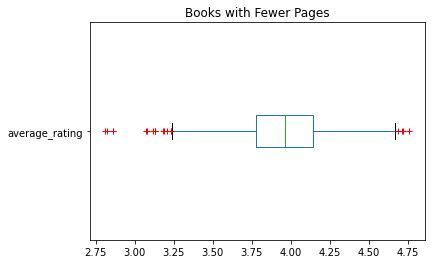

In [12]:
dframe = pd.DataFrame(high_rating_few_pages['average_rating'])
dframe.plot.box(vert=False, title="Books with Fewer Pages", sym='r+')

In [13]:
# cutoff that decides whether a book is small or big book
few_pages_cutoff = 300
# cutoff that decides whether a book has a big ratings count
ratings_count_cutoff = 1000
# filter dataframe to get a list of books with many pages
many_pages = books[books['num_pages'] > few_pages_cutoff]
# filter many_pages df to get books with high ratings count
high_rating_many_pages = many_pages[many_pages['ratings_count'] > ratings_count_cutoff]
# sort new df in descending order and display the top book
high_rating_many_pages.sort_values(by=['average_rating'], ascending=False)[:1]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
6590,24812,The Complete Calvin and Hobbes,Bill Watterson,4.82,740748475,9780740748479,eng,1456,32213,930,2005-09-06,Andrews McMeel Publishing


<AxesSubplot:title={'center':'Books with Large Page Count'}>

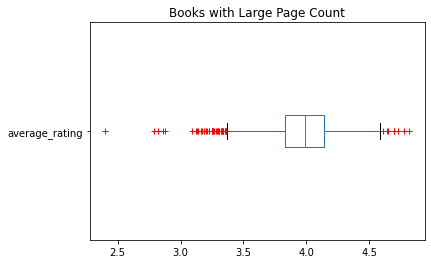

In [14]:
df = pd.DataFrame(high_rating_many_pages['average_rating'])
df.plot.box(vert=False, title="Books with Large Page Count", sym='r+')

**Observation**: Both books are written by Bill Watterson. Both have high average ratings, but they are opposite in the page count. With regards to the average rating, there is only 0.06 difference between the top book in each category as indicated in the boxplots. Our boxplots also reveal to us that the median average rating for both categories is near 4.0, which tells us that a book's page count may not affect its average rating as much as we think. 

## What is the most popular book in the 1980's?

This question is an extension of the first question where we were finding the most popular book. It is obvious that we have to consider books that fall between January 1980 and December 1989, and thus we have to take into account the *publication_date* column. We must filter our books dataframe to collect all books published in the 1980's. In order to compare dates, we need to remember that the *publication_date* column returns a DateTimeArray (datetime64[ns]), and so we should use **pandas.Timestamp** to create our datetime objects with which to winnow out books that are out of date range. Only then can we continue looking for the most popular book in the new dataframe.

In [24]:
# start and end of desired decade
decade_start = pd.Timestamp(1980,1,1)
decade_end = pd.Timestamp(1990,1,1)
# filter our books df using the dates
books_1980s = books[(books['publication_date'] > decade_start) & (books['publication_date'] < decade_end)]

In [27]:
# verify our new df 
# by gett the first book of 1980s
books_1980s.sort_values(by=['publication_date'])[:1]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
10032,40384,Synthetic Men of Mars (Barsoom #9),Edgar Rice Burroughs,3.78,345339304,9780345339300,eng,160,2601,58,1980-01-12,Del Rey


In [29]:
# by getting the last book of 1980s
books_1980s.sort_values(by=['publication_date'])[-1:]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
6934,26154,Good Grief: The Story of Charles M. Schulz,Rheta Grimsley Johnson,3.72,886875536,9780886875534,eng,256,20,1,1989-12-31,Pharos Books


In [34]:
# filter our new df with two cutoff points
# reference back to our old cutoff points for ratings_count and average_rating
high_count_books = books_1980s[books_1980s['ratings_count'] > ratings_count_cutoff]
popular_books_80s = high_count_books[high_count_books['average_rating'] > rating_cutoff]
# find the top book of the 1980s
popular_books_80s.sort_values(by=['average_rating'], ascending=False)[:1]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
8579,32951,Sister Outsider: Essays and Speeches,Audre Lorde,4.49,895941414,9780895941411,en-GB,190,12105,568,1984-06-01,Crossing Press
